In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import kaepora as kpora
import flux_calibration as fc
import composite

In [113]:
query_test = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where Spectra.SN = '2007on' and Flux_Cal_Scale"
spec_array_test = kpora.grab(query_test, multi_epoch = True, make_corr = True, verbose=True)
for spec in spec_array_test:
    spec = fc.MW_correction(spec, undo=True)
spec_array_test = composite.prelim_norm(spec_array_test) #flux cal scalings are based off pre-MW corrected, normalized spectra

Using: ../data/kaepora_v1.db
21 Total Spectra found
0 flagged spectra removed 21 spectra left
0 spectra of peculiar Ias removed 21 spectra left
21 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
2007on sn2007on-20071112.468-br.flm bsnip 435.066958052 -2.68555865827 54416.473 54419.176 0.00649449293351 3.0 3084.0 9060.0
2007on sn2007on-20071201.053-br.flm bsnip 136.475833294 15.7745522817 54435.053 54419.176 0.00649449293351 3.0 4028.0 10280.0
2007on sn2007on-20071213.349-br.flm bsnip 121.172274952 27.9912112762 54447.349 54419.176 0.00649449293351 3.0 3344.0 9024.0
2007on SN07on_071111_b01_DUP_WF.dat csp 175.561812001 -3.86092524822 54415.29 54419.176 0.00649449293351 3.0 3828.0 9124.0
2007on SN07on_071114_b01_DUP_WF.dat csp 166.129538562 -0.830605637704 54418.34 54419.176 0.00649449293351 3.0 3828.0 9124.0
2007on SN07on_071117_r01_BAA_IM.dat csp 196.475989956 2.03081091308 54421.22 54419.17

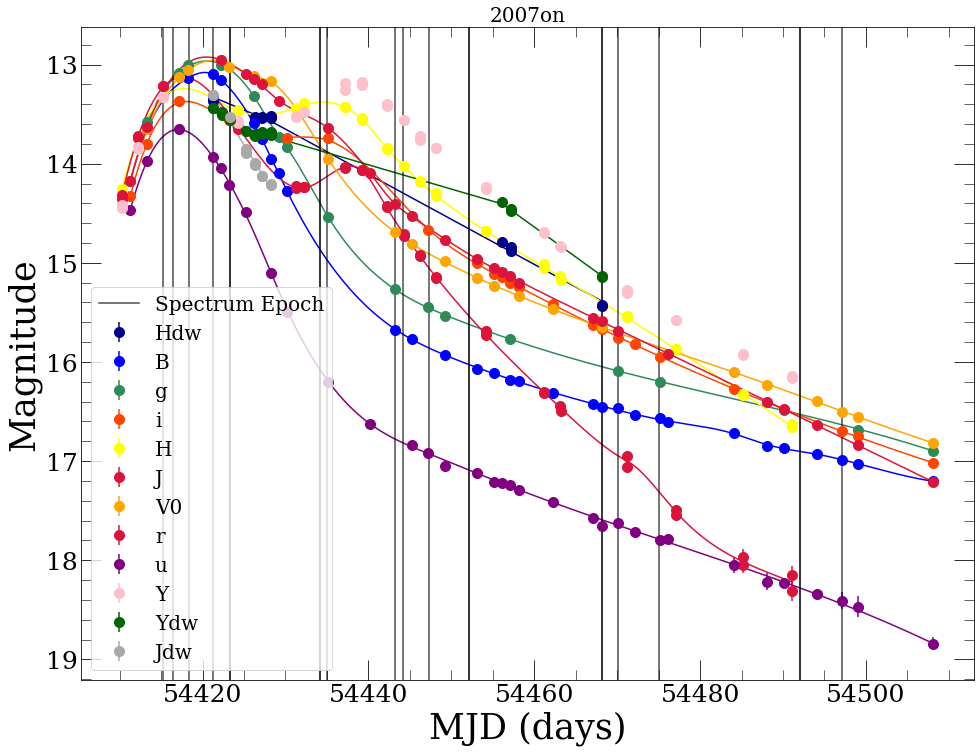

In [114]:
phot = spec_array_test[0].homog_light_curves
mjds = []
for spec in spec_array_test:
    mjds.append(spec.mjd)
fc.plot_light_curves(phot, spec.name, spec_dates = mjds, fit=True)

In [115]:
for spec in spec_array_test:
    spec.flux *= spec.other_spectral_data['Flux_Cal_Scale']
    spec.ivar /= spec.other_spectral_data['Flux_Cal_Scale']**2.

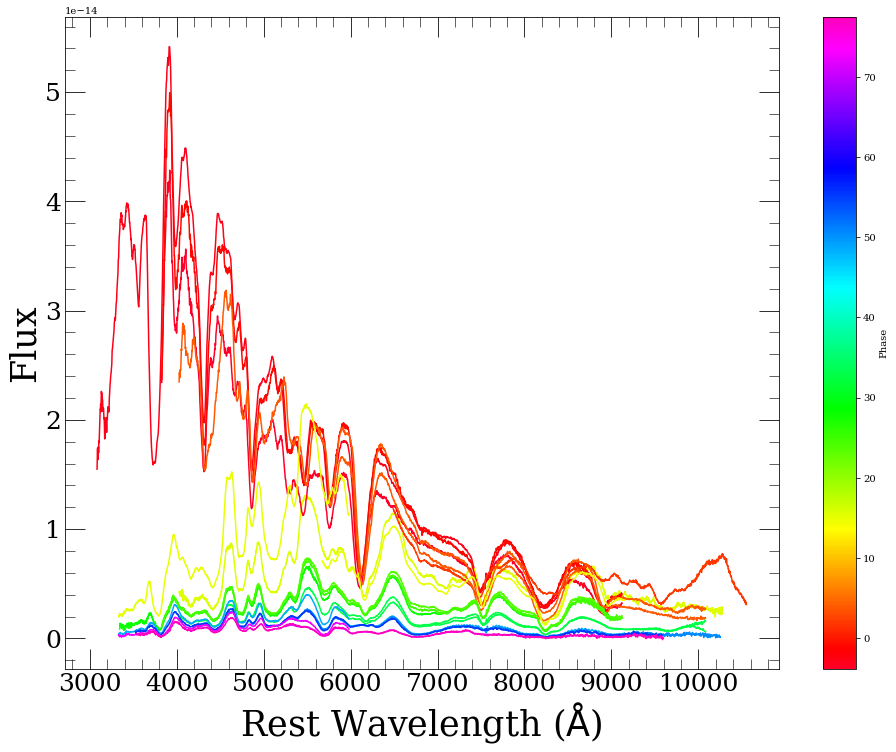

In [116]:
for spec in spec_array_test:
    spec = fc.MW_correction(spec, undo=False)
    spec = fc.host_correction(spec, undo=False)
fc.plot_spectra(spec_array_test)

In [117]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [118]:
phases = []
waves = []
fluxes = []
colors = []
s_m = fc.make_colorbar(spec_array_test)
for spec in spec_array_test:
    waves.append(spec.wavelength)
    fluxes.append(spec.flux)
    phases.append(np.full(len(spec_array_test[0].wavelength), spec.phase))
    colors.append(s_m.to_rgba(spec.phase))
phases = np.asarray(phases)
waves = np.asarray(waves)
fluxes = np.asarray(fluxes)

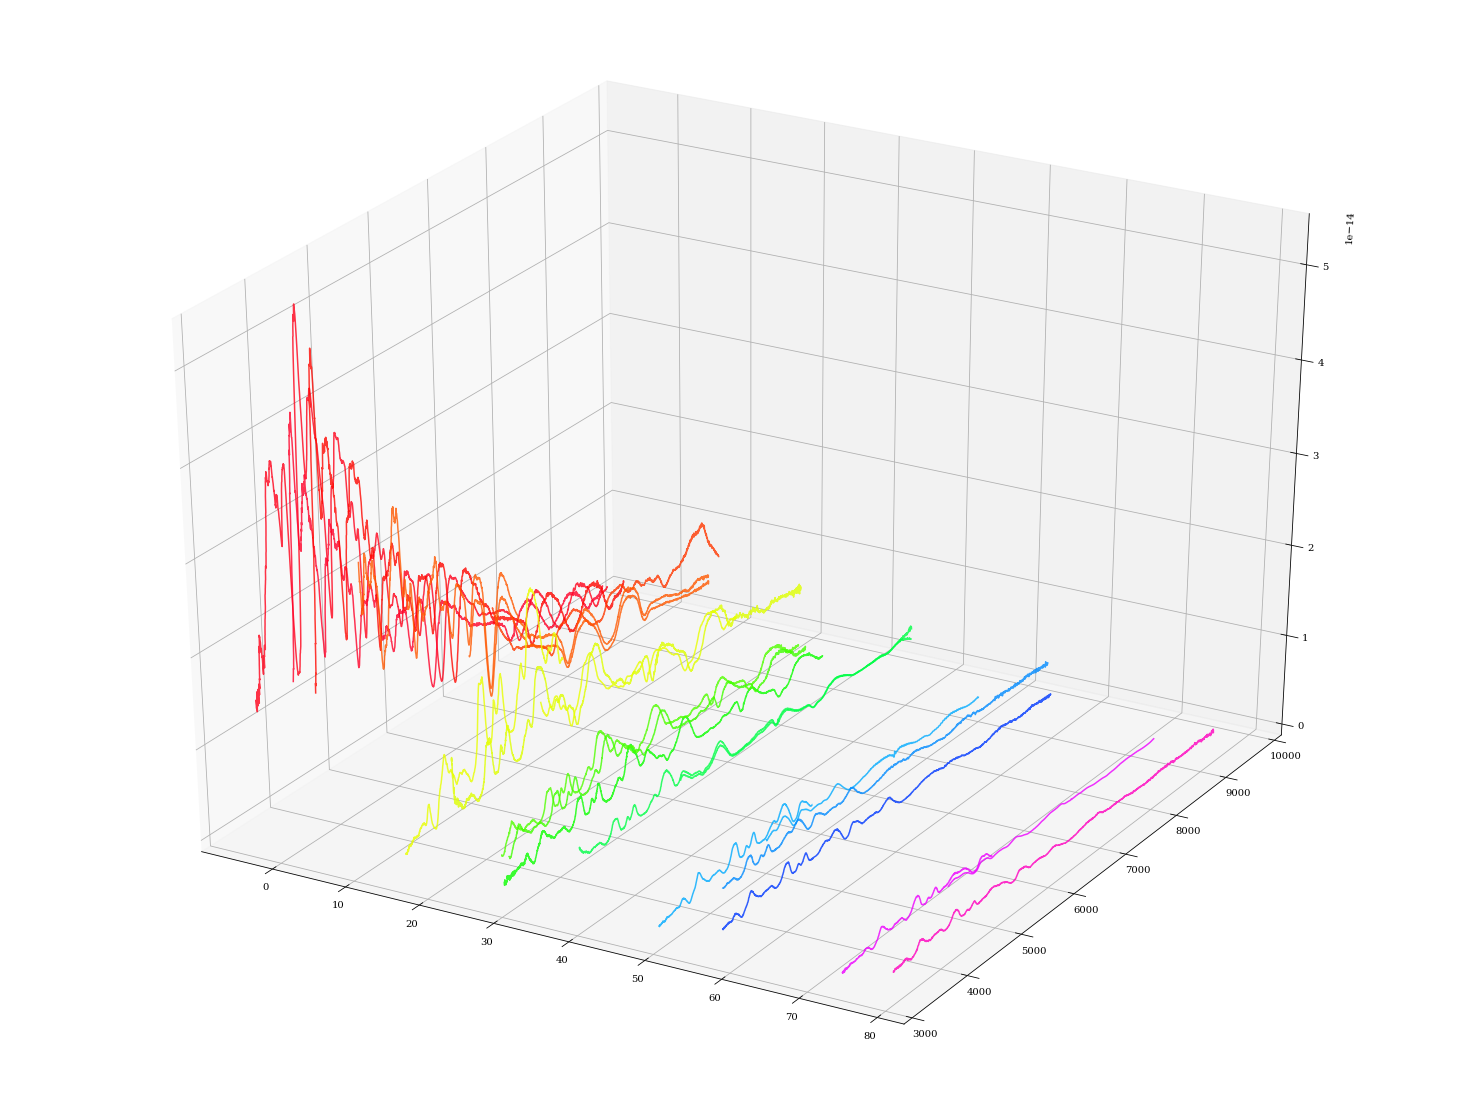

In [119]:
fig = plt.figure(figsize=(20,15))
ax = Axes3D(fig)
ax.plot_wireframe(phases, waves, fluxes, rstride=1, cstride=10000, alpha=.8, color = colors)
ax.set_ylim([3000,10000])
ax.view_init(30, -60)
plt.show()